In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Random Data Generation

In [2]:
np.random.seed(42)

# Generate synthetic sales data for 20 items over 10 weeks (70 days)
num_items = 20
num_days = 70

# Simulate sales with different distributions (slow, medium, fast)
sales_data = {
    f"Item_{i+1}": np.random.randint(low=1, high=np.random.choice([5, 15, 30]), size=num_days)
    for i in range(num_items)
}

sales_df = pd.DataFrame(sales_data, index=pd.date_range(start="2024-01-01", periods=num_days))

## IQR thresholds

In [3]:
# Compute average sales per item
avg_sales = sales_df.mean()

# Calculate IQR-based thresholds
Q1 = avg_sales.quantile(0.25)
Q3 = avg_sales.quantile(0.75)
IQR = Q3 - Q1

# Define slow, medium, fast categories
slow_threshold = Q1
fast_threshold = Q3

# Assign categories
categories = pd.cut(
    avg_sales,
    bins=[-np.inf, slow_threshold, fast_threshold, np.inf],
    labels=["Slow", "Medium", "Fast"]
)

# Combine results into a DataFrame
results_df = pd.DataFrame({"Average Sales": avg_sales, "Category": categories})

## Visualization

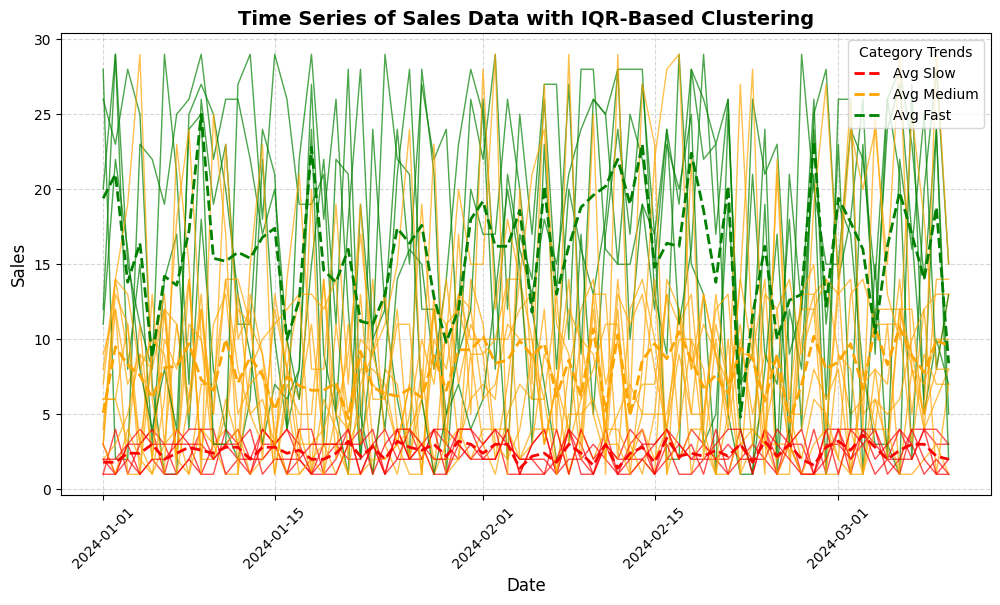

In [ ]:
plt.figure(figsize=(12, 6))

colors = {"Slow": "red", "Medium": "orange", "Fast": "green"}

for item in sales_df.columns:
    category = results_df.loc[item, "Category"]
    plt.plot(sales_df.index, sales_df[item],
             label=item,
             color=colors[category],
             alpha=0.7, linewidth=1)

# Category-wise average trend lines for better visibility
for category, color in colors.items():
    category_items = results_df[results_df["Category"] == category].index
    if not category_items.empty:
        avg_trend = sales_df[category_items].mean(axis=1)
        plt.plot(sales_df.index, avg_trend,
                 label=f"Avg {category}",
                 color=color,
                 linewidth=2, linestyle="dashed")


plt.title("Time Series of Sales Data with IQR-Based Clustering", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
filtered_handles = [handles[i] for i in range(len(handles)) if "Avg" in labels[i]]
filtered_labels = [labels[i] for i in range(len(labels)) if "Avg" in labels[i]]
plt.legend(filtered_handles, filtered_labels, loc="upper right", fontsize="medium", title="Category Trends")

plt.show()


## t-test

In [5]:
from scipy.stats import ttest_ind

# Extract sales data for fast and slow items
fast_items = results_df[results_df["Category"] == "Fast"].index
slow_items = results_df[results_df["Category"] == "Slow"].index

# Average daily sales of fast items
fast_sales = sales_df[fast_items].mean(axis=1)
# Average daily sales of slow items
slow_sales = sales_df[slow_items].mean(axis=1)

# Independent t-test
t_stat, p_value = ttest_ind(fast_sales, slow_sales, equal_var=False)  # Welch’s t-test

# Display results
t_stat, p_value

(28.053428206000117, 3.1295734392070566e-40)

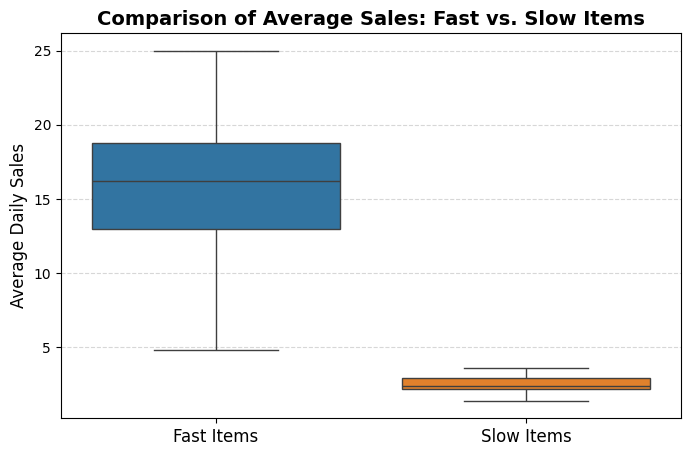

In [8]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=[fast_sales.tolist(), slow_sales.tolist()])

plt.xticks([0, 1], ["Fast Items", "Slow Items"], fontsize=12)
plt.ylabel("Average Daily Sales", fontsize=12)
plt.title("Comparison of Average Sales: Fast vs. Slow Items", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

